In [19]:
import pandas as pd
import numpy as np
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [5]:
 df = pd.read_csv('/content/Employee-Attrition - Employee-Attrition.csv')

In [6]:
df_raw = df.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [12]:
df['MonthlyIncome'].max()

19999

In [13]:
df['Age'].max()

60

In [14]:
df['Age'].min()


18

In [15]:
df['EmployeeCount'].sum()

np.int64(1470)

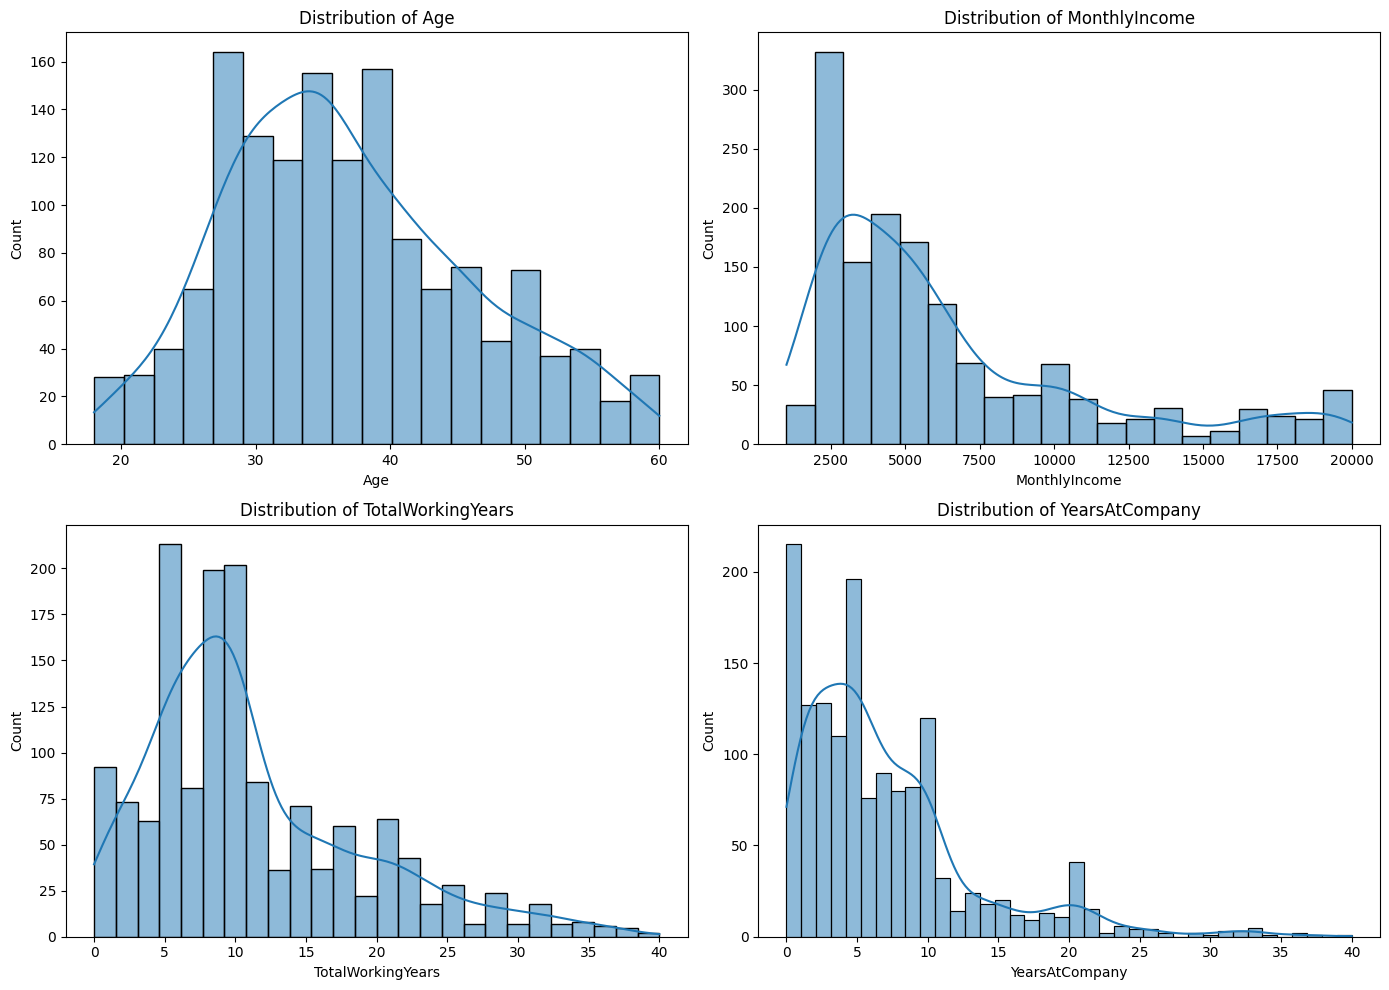

In [16]:
numerical_cols = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']

# Figure for Histograms
fig1, axes1 = plt.subplots(2, 2, figsize=(14, 10))
axes1 = axes1.flatten() # Flatten the 2x2 array of axes to easily iterate

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes1[i], color='#1f77b4')
    axes1[i].set_title(f'Distribution of {col}')
    axes1[i].set_xlabel(col)
    axes1[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

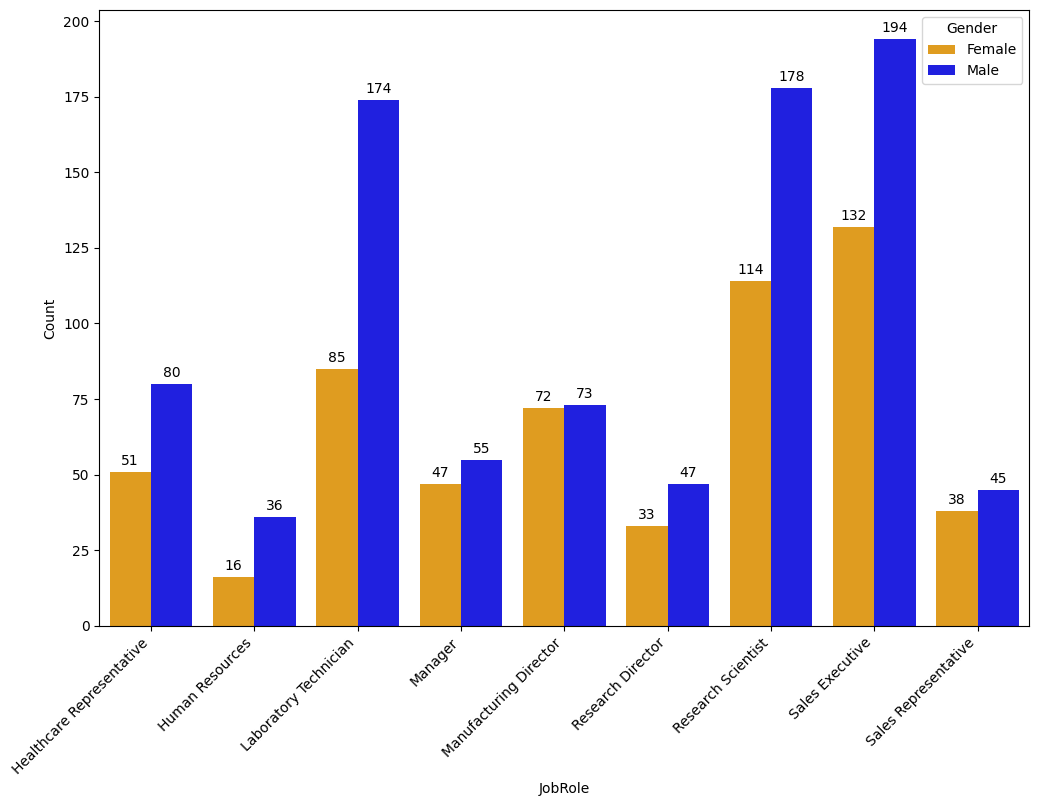

In [17]:
gender_jobrole_counts = df.groupby(['JobRole', 'Gender']).size().reset_index(name='Count')

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=gender_jobrole_counts,
    x='JobRole',
    y='Count',
    hue='Gender',
    palette={'Male': 'Blue', 'Female': 'Orange'}
)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
    plt.xticks(rotation=45, ha='right')

In [20]:
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True, errors='ignore')
df2 = df.copy()

In [25]:
from re import X
le = LabelEncoder()
df2['Attrition'] = le.fit_transform(df2['Attrition'])
x= df2.drop('Attrition', axis=1)
y = df2['Attrition']

In [27]:
x_encoded = pd.get_dummies(x, drop_first=True)
all_feature_cols = x_encoded.columns.tolist()

In [28]:
 x_train, x_test, y_train, y_test = train_test_split(
        x_encoded, y, test_size=0.25, random_state=42, stratify=y)

In [29]:
x_train.shape, x_test.shape

((1102, 44), (368, 44))

In [30]:
y_train.shape, y_test.shape

((1102,), (368,))

In [32]:
logreg_model = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(
            C=0.01,
            solver='liblinear',
            random_state=42,
            class_weight='balanced'
        ))
    ])
logreg_model.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    random_state=42, solver='liblinear'))])

In [35]:
attrition_model = RandomForestClassifier(n_estimators=100, random_state=42)
attrition_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
attrition_model, logreg_model, x_test, y_test, df_raw, x_encoded.columns

(RandomForestClassifier(random_state=42),
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('logreg',
                  LogisticRegression(C=0.01, class_weight='balanced',
                                     random_state=42, solver='liblinear'))]),
       Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
 1307   28       1217                 1          3                        3   
 1190   32        977                 2          3                        4   
 1026   32        601                 7          5                        4   
 1212   34        678                19          3                        2   
 551    39        141                 3          3                        3   
 ...   ...        ...               ...        ...                      ...   
 581    30        921                 1          3                        4   
 577    37        571                10          1                        4   
 843    26       1384   

In [45]:
model = attrition_model
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_proba)
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

In [46]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [47]:
y_proba

array([0.04, 0.01, 0.12, 0.04, 0.1 , 0.08, 0.07, 0.08, 0.31, 0.13, 0.85,
       0.18, 0.19, 0.2 , 0.17, 0.35, 0.15, 0.2 , 0.08, 0.05, 0.1 , 0.32,
       0.06, 0.15, 0.11, 0.24, 0.14, 0.33, 0.59, 0.1 , 0.19, 0.03, 0.05,
       0.56, 0.05, 0.06, 0.14, 0.02, 0.18, 0.03, 0.19, 0.02, 0.4 , 0.13,
       0.14, 0.32, 0.05, 0.05, 0.24, 0.29, 0.11, 0.06, 0.18, 0.21, 0.37,
       0.19, 0.26, 0.05, 0.19, 0.16, 0.16, 0.15, 0.29, 0.04, 0.42, 0.17,
       0.13, 0.14, 0.28, 0.31, 0.48, 0.21, 0.28, 0.17, 0.14, 0.09, 0.24,
       0.32, 0.31, 0.1 , 0.15, 0.11, 0.13, 0.08, 0.11, 0.09, 0.08, 0.18,
       0.23, 0.67, 0.34, 0.25, 0.07, 0.17, 0.17, 0.11, 0.08, 0.3 , 0.22,
       0.71, 0.05, 0.16, 0.03, 0.03, 0.12, 0.1 , 0.15, 0.05, 0.16, 0.15,
       0.21, 0.32, 0.26, 0.14, 0.13, 0.05, 0.32, 0.11, 0.27, 0.18, 0.28,
       0.13, 0.06, 0.2 , 0.07, 0.05, 0.11, 0.28, 0.37, 0.11, 0.38, 0.04,
       0.17, 0.08, 0.06, 0.32, 0.05, 0.2 , 0.12, 0.44, 0.23, 0.03, 0.  ,
       0.08, 0.15, 0.02, 0.05, 0.28, 0.16, 0.45, 0.

In [48]:
auc_roc

np.float64(0.7732159508529428)

In [50]:
def display_metrics(model, x_test, y_test):
  display_metrics(best_model, x_test, y_test)

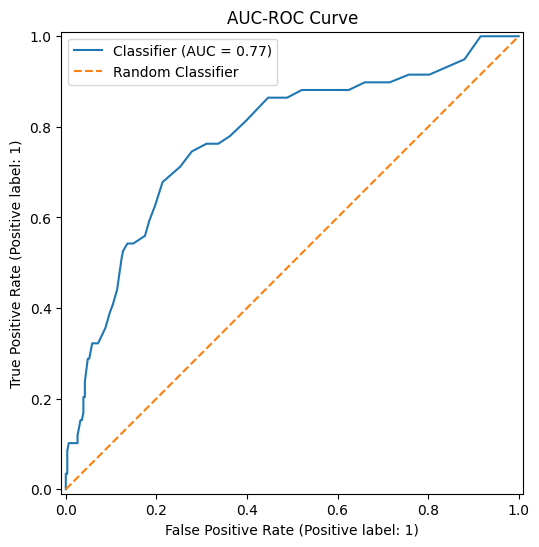

In [51]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_test, y_proba, ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
ax.set_title('AUC-ROC Curve')
ax.legend()
plt.show()

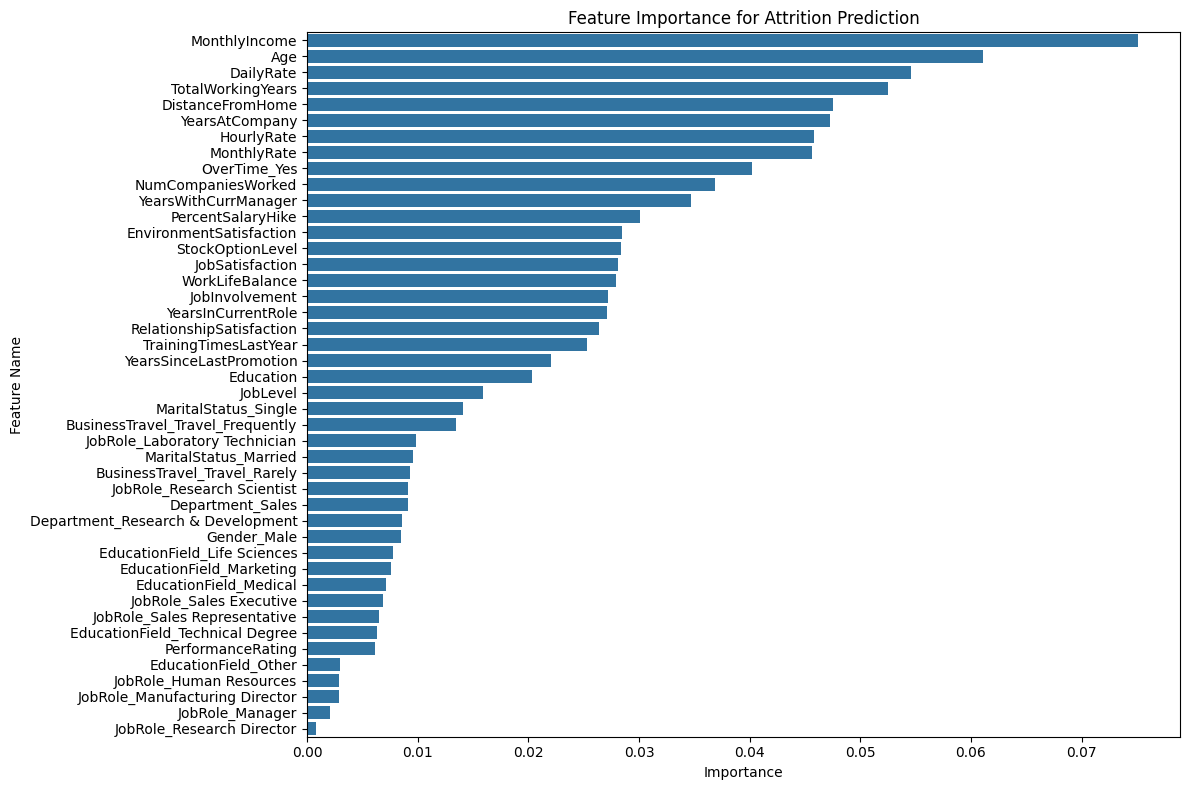

In [53]:
feature_importances = attrition_model.feature_importances_

feature_names = x_encoded.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Attrition Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()